In [1]:
import os
import numpy as np
from NN import Agent
from arm_gym import ArmEnv
import imageio
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.0.0


In [2]:
MAX_EP_STEPS = 30
gamma = 0.95    # reward discount
tau = 0.005      # soft replacement
lr_a = 0.01    # learning rate for actor
lr_c = 0.02    # learning rate for critic
layer1 = 600
layer2 = 400
memory_capacity = 50000
batch_size = 32
noise = 0.1
episodes = 2000
action_size = 2
ops_dims = [2]

TRAIN = True
model_path = 'model_arm_ddpg'
gifs_path = 'gifs_arm_ddpg'
train_log_dir = 'logs'

In [3]:
for path in [model_path, gifs_path, train_log_dir]:
    if not os.path.exists(path):
        os.makedirs(path) 

In [4]:
value_loss = tf.keras.metrics.Mean('value_loss', dtype=tf.float32)
policy_loss = tf.keras.metrics.Mean('policy_loss', dtype=tf.float32)
summary_writer = tf.summary.create_file_writer(train_log_dir)

In [5]:
def train():
    env = ArmEnv()
    agent = Agent(input_dims=ops_dims, env=env, n_actions=action_size, 
                  model_dir=model_path, alpha=lr_a, beta=lr_c, 
                  gamma=gamma, max_size=memory_capacity, tau=tau, 
                  fc1=layer1, fc2=layer2, batch_size=batch_size, 
                  noise=noise)

    np.random.seed(0)
    score_history = []
    step_history = []
    success = []

    for i in range(episodes):
        save_gif = False
        obs = env.reset()
        if i % 50 == 0:
            save_gif = True
            frames = [env.render(False)]
        done = False
        score = 0
        steps = 0
        for j in range(MAX_EP_STEPS):
            act = agent.choose_action(obs)
            new_state, reward, done = env.step(act)           
            agent.remember(obs, act, reward, new_state, int(done))
            summary = agent.learn()
            if summary is not None:            
                critic_loss, actor_loss, critic_network_gradient, actor_network_gradient = summary
                value_loss(critic_loss)
                policy_loss(actor_loss)
            score += reward
            obs = new_state
            if save_gif:
                frames.append(env.render(False))
            if done == True or j == MAX_EP_STEPS-1:
                if reward == 1.:
                    success.append(1)
                else:
                    success.append(0)
                step_history.append(j)
                score_history.append(score)
                break
                
        if save_gif:
            file = os.path.join(os.getcwd(), gifs_path, '{} episode.gif'.format(i))
            imageio.mimwrite(file, frames, fps=7)
        
        avg_success = np.mean(success[-100:])
        avg_step = np.mean(step_history[-100:])
        avg_score = np.mean(score_history[-100:])
        with summary_writer.as_default():
            tf.summary.scalar('value_loss', value_loss.result(), step=i)
            tf.summary.scalar('policy_loss', policy_loss.result(), step=i)
            tf.summary.scalar('average_score', avg_score, step=i)
            tf.summary.scalar('average_success', avg_success, step=i)
            tf.summary.scalar('average_steps', avg_step, step=i)
        value_loss.reset_states()
        policy_loss.reset_states()
        #save model when current score exceeds moving average score
        if score > avg_score:
            agent.save_models()
            
        print('episode ', i, 'score %.2f' % score, 'avg_score %.3f' % avg_score)
        print('number of success:', np.sum(success))        

episode  0 score -1.60 avg_score -1.600
number of success: 0
episode  1 score 0.00 avg_score -0.800
number of success: 0
episode  2 score 1.00 avg_score -0.200
number of success: 1
episode  3 score -2.40 avg_score -0.750
number of success: 1
episode  4 score 0.00 avg_score -0.600
number of success: 1
episode  5 score -0.80 avg_score -0.633
number of success: 1
episode  6 score 0.00 avg_score -0.543
number of success: 1
episode  7 score 0.00 avg_score -0.475
number of success: 1
episode  8 score -1.60 avg_score -0.600
number of success: 1
episode  9 score 0.00 avg_score -0.540
number of success: 1
episode  10 score 0.00 avg_score -0.491
number of success: 1
episode  11 score 0.00 avg_score -0.450
number of success: 1
episode  12 score 0.20 avg_score -0.400
number of success: 2
episode  13 score 0.00 avg_score -0.371
number of success: 2
episode  14 score 0.00 avg_score -0.347
number of success: 2
episode  15 score 0.00 avg_score -0.325
number of success: 2
episode  16 score 0.00 avg_sco

episode  132 score -2.40 avg_score -1.166
number of success: 31
episode  133 score 0.00 avg_score -1.166
number of success: 31
episode  134 score -2.60 avg_score -1.194
number of success: 31
episode  135 score -4.00 avg_score -1.234
number of success: 31
episode  136 score -3.20 avg_score -1.266
number of success: 31
episode  137 score 1.00 avg_score -1.234
number of success: 32
episode  138 score 0.00 avg_score -1.234
number of success: 32
episode  139 score -1.60 avg_score -1.226
number of success: 32
episode  140 score 0.00 avg_score -1.236
number of success: 32
episode  141 score -3.20 avg_score -1.244
number of success: 32
episode  142 score -1.40 avg_score -1.258
number of success: 33
episode  143 score 0.00 avg_score -1.260
number of success: 33
episode  144 score -1.60 avg_score -1.276
number of success: 33
episode  145 score 1.00 avg_score -1.276
number of success: 34
episode  146 score 0.00 avg_score -1.236
number of success: 34
episode  147 score -2.80 avg_score -1.264
numbe

episode  262 score 0.00 avg_score -1.258
number of success: 67
episode  263 score 1.00 avg_score -1.248
number of success: 68
episode  264 score 1.00 avg_score -1.248
number of success: 69
episode  265 score -1.60 avg_score -1.264
number of success: 69
episode  266 score -3.20 avg_score -1.296
number of success: 69
episode  267 score -2.40 avg_score -1.320
number of success: 69
episode  268 score 0.00 avg_score -1.288
number of success: 69
episode  269 score -4.80 avg_score -1.346
number of success: 69
episode  270 score 0.00 avg_score -1.312
number of success: 69
episode  271 score 0.00 avg_score -1.312
number of success: 69
episode  272 score -5.00 avg_score -1.362
number of success: 69
episode  273 score -5.60 avg_score -1.418
number of success: 69
episode  274 score -2.40 avg_score -1.452
number of success: 69
episode  275 score 0.20 avg_score -1.418
number of success: 70
episode  276 score 0.00 avg_score -1.412
number of success: 70
episode  277 score -2.40 avg_score -1.430
number

episode  392 score -1.60 avg_score -1.094
number of success: 95
episode  393 score -4.00 avg_score -1.110
number of success: 95
episode  394 score 0.00 avg_score -1.084
number of success: 95
episode  395 score 0.00 avg_score -1.084
number of success: 95
episode  396 score -1.00 avg_score -1.072
number of success: 95
episode  397 score -2.40 avg_score -1.072
number of success: 95
episode  398 score -3.20 avg_score -1.080
number of success: 95
episode  399 score 0.00 avg_score -1.064
number of success: 95
episode  400 score -3.20 avg_score -1.096
number of success: 95
episode  401 score 0.00 avg_score -1.090
number of success: 95
episode  402 score -1.60 avg_score -1.088
number of success: 95
episode  403 score 1.00 avg_score -1.078
number of success: 96
episode  404 score 1.00 avg_score -1.068
number of success: 97
episode  405 score -1.60 avg_score -1.060
number of success: 97
episode  406 score -0.80 avg_score -1.068
number of success: 97
episode  407 score 0.00 avg_score -1.060
numbe

episode  520 score -2.60 avg_score -1.276
number of success: 129
episode  521 score 0.00 avg_score -1.220
number of success: 129
episode  522 score 1.00 avg_score -1.154
number of success: 130
episode  523 score 1.00 avg_score -1.088
number of success: 131
episode  524 score -0.80 avg_score -1.106
number of success: 131
episode  525 score -5.80 avg_score -1.164
number of success: 131
episode  526 score 0.00 avg_score -1.174
number of success: 131
episode  527 score 0.00 avg_score -1.166
number of success: 131
episode  528 score 0.00 avg_score -1.166
number of success: 131
episode  529 score 0.00 avg_score -1.166
number of success: 131
episode  530 score 1.00 avg_score -1.156
number of success: 132
episode  531 score -4.00 avg_score -1.180
number of success: 132
episode  532 score 1.00 avg_score -1.146
number of success: 133
episode  533 score 1.00 avg_score -1.104
number of success: 134
episode  534 score -2.60 avg_score -1.066
number of success: 134
episode  535 score -1.60 avg_score 

episode  647 score -2.40 avg_score -1.164
number of success: 159
episode  648 score 0.00 avg_score -1.174
number of success: 159
episode  649 score 0.00 avg_score -1.174
number of success: 159
episode  650 score 0.20 avg_score -1.148
number of success: 160
episode  651 score 1.00 avg_score -1.148
number of success: 161
episode  652 score 0.00 avg_score -1.132
number of success: 161
episode  653 score 0.00 avg_score -1.142
number of success: 161
episode  654 score -0.80 avg_score -1.152
number of success: 161
episode  655 score -2.60 avg_score -1.154
number of success: 161
episode  656 score -1.00 avg_score -1.130
number of success: 161
episode  657 score -2.40 avg_score -1.122
number of success: 161
episode  658 score 0.00 avg_score -1.098
number of success: 161
episode  659 score 0.00 avg_score -1.090
number of success: 161
episode  660 score -3.20 avg_score -1.122
number of success: 161
episode  661 score -0.80 avg_score -1.130
number of success: 161
episode  662 score -1.60 avg_scor

episode  775 score -1.80 avg_score -1.054
number of success: 177
episode  776 score -3.20 avg_score -1.046
number of success: 177
episode  777 score -2.40 avg_score -1.062
number of success: 177
episode  778 score -1.60 avg_score -1.088
number of success: 177
episode  779 score 1.00 avg_score -1.062
number of success: 178
episode  780 score 0.00 avg_score -1.062
number of success: 178
episode  781 score -2.60 avg_score -1.098
number of success: 178
episode  782 score -2.40 avg_score -1.090
number of success: 178
episode  783 score -2.60 avg_score -1.116
number of success: 178
episode  784 score -0.80 avg_score -1.098
number of success: 178
episode  785 score -3.20 avg_score -1.130
number of success: 178
episode  786 score 1.00 avg_score -1.088
number of success: 179
episode  787 score 0.00 avg_score -1.080
number of success: 179
episode  788 score -3.20 avg_score -1.112
number of success: 179
episode  789 score 0.00 avg_score -1.122
number of success: 179
episode  790 score 0.00 avg_sc

episode  902 score 0.00 avg_score -1.444
number of success: 206
episode  903 score 0.00 avg_score -1.420
number of success: 206
episode  904 score -3.40 avg_score -1.454
number of success: 206
episode  905 score -6.40 avg_score -1.518
number of success: 206
episode  906 score -3.20 avg_score -1.524
number of success: 206
episode  907 score 0.00 avg_score -1.484
number of success: 206
episode  908 score 0.20 avg_score -1.482
number of success: 207
episode  909 score 0.00 avg_score -1.450
number of success: 207
episode  910 score 0.00 avg_score -1.424
number of success: 207
episode  911 score 0.00 avg_score -1.424
number of success: 207
episode  912 score 0.00 avg_score -1.416
number of success: 207
episode  913 score 0.00 avg_score -1.416
number of success: 207
episode  914 score -4.20 avg_score -1.458
number of success: 207
episode  915 score -0.80 avg_score -1.466
number of success: 207
episode  916 score -1.60 avg_score -1.412
number of success: 207
episode  917 score -2.60 avg_score

C:\Users\cryst\Study\Master\RL\Project 2\sample\arm_gym.py:225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
C:\Users\cryst\Study\Master\RL\Project 2\sample\arm_gym.py:225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
C:\Users\cryst\Study\Master\RL\Project 2\sample\arm_gym.py:225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this 

C:\Users\cryst\Study\Master\RL\Project 2\sample\arm_gym.py:225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
C:\Users\cryst\Study\Master\RL\Project 2\sample\arm_gym.py:225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
C:\Users\cryst\Study\Master\RL\Project 2\sample\arm_gym.py:225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this 

episode  950 score 0.00 avg_score -1.408
number of success: 212
episode  951 score 1.00 avg_score -1.398
number of success: 213
episode  952 score 0.00 avg_score -1.382
number of success: 213
episode  953 score -1.60 avg_score -1.398
number of success: 213
episode  954 score 1.00 avg_score -1.348
number of success: 214
episode  955 score 1.00 avg_score -1.312
number of success: 215
episode  956 score -1.60 avg_score -1.304
number of success: 215
episode  957 score -2.40 avg_score -1.312
number of success: 215
episode  958 score -2.40 avg_score -1.312
number of success: 215
episode  959 score 0.00 avg_score -1.296
number of success: 215
episode  960 score 0.00 avg_score -1.272
number of success: 215
episode  961 score 0.00 avg_score -1.272
number of success: 215
episode  962 score 0.00 avg_score -1.240
number of success: 216
episode  963 score -0.80 avg_score -1.248
number of success: 216
episode  964 score -1.00 avg_score -1.258
number of success: 216
episode  965 score -2.60 avg_score

C:\Users\cryst\Study\Master\RL\Project 2\sample\arm_gym.py:225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


episode  1000 score 0.00 avg_score -1.128
number of success: 227
episode  1001 score -0.80 avg_score -1.118
number of success: 227
episode  1002 score -1.00 avg_score -1.128
number of success: 227
episode  1003 score 0.20 avg_score -1.126
number of success: 228
episode  1004 score -0.80 avg_score -1.100
number of success: 228
episode  1005 score 0.00 avg_score -1.036
number of success: 228
episode  1006 score -1.60 avg_score -1.020
number of success: 228
episode  1007 score -3.20 avg_score -1.052
number of success: 228
episode  1008 score 0.00 avg_score -1.054
number of success: 228
episode  1009 score -1.60 avg_score -1.070
number of success: 228
episode  1010 score -5.20 avg_score -1.122
number of success: 228
episode  1011 score 0.00 avg_score -1.122
number of success: 228
episode  1012 score -4.00 avg_score -1.162
number of success: 229
episode  1013 score -1.60 avg_score -1.178
number of success: 229
episode  1014 score 1.00 avg_score -1.126
number of success: 230
episode  1015 sc

episode  1126 score -1.60 avg_score -1.214
number of success: 257
episode  1127 score -4.00 avg_score -1.256
number of success: 257
episode  1128 score 0.00 avg_score -1.266
number of success: 257
episode  1129 score -4.00 avg_score -1.264
number of success: 257
episode  1130 score -0.80 avg_score -1.274
number of success: 257
episode  1131 score 0.00 avg_score -1.274
number of success: 258
episode  1132 score -1.00 avg_score -1.284
number of success: 258
episode  1133 score -2.80 avg_score -1.296
number of success: 258
episode  1134 score -3.20 avg_score -1.296
number of success: 258
episode  1135 score -1.60 avg_score -1.312
number of success: 258
episode  1136 score -1.00 avg_score -1.306
number of success: 258
episode  1137 score -1.60 avg_score -1.332
number of success: 258
episode  1138 score -3.60 avg_score -1.360
number of success: 258
episode  1139 score -2.60 avg_score -1.360
number of success: 258
episode  1140 score 0.00 avg_score -1.370
number of success: 258
episode  1141

episode  1252 score -5.40 avg_score -1.322
number of success: 282
episode  1253 score -2.60 avg_score -1.358
number of success: 282
episode  1254 score 0.00 avg_score -1.342
number of success: 282
episode  1255 score -1.60 avg_score -1.368
number of success: 282
episode  1256 score -3.20 avg_score -1.352
number of success: 282
episode  1257 score 0.00 avg_score -1.362
number of success: 282
episode  1258 score -1.60 avg_score -1.380
number of success: 282
episode  1259 score -2.60 avg_score -1.406
number of success: 282
episode  1260 score 0.00 avg_score -1.374
number of success: 282
episode  1261 score -3.20 avg_score -1.406
number of success: 282
episode  1262 score -3.20 avg_score -1.438
number of success: 282
episode  1263 score 0.00 avg_score -1.418
number of success: 282
episode  1264 score 0.00 avg_score -1.384
number of success: 282
episode  1265 score -2.40 avg_score -1.374
number of success: 282
episode  1266 score 0.00 avg_score -1.374
number of success: 282
episode  1267 sc

episode  1378 score -2.60 avg_score -0.912
number of success: 314
episode  1379 score -3.20 avg_score -0.954
number of success: 314
episode  1380 score -3.40 avg_score -0.980
number of success: 314
episode  1381 score -2.40 avg_score -1.006
number of success: 314
episode  1382 score -2.40 avg_score -1.040
number of success: 314
episode  1383 score -3.40 avg_score -1.084
number of success: 314
episode  1384 score 0.00 avg_score -1.084
number of success: 314
episode  1385 score 0.00 avg_score -1.044
number of success: 314
episode  1386 score -3.20 avg_score -1.020
number of success: 315
episode  1387 score 0.20 avg_score -1.018
number of success: 316
episode  1388 score -3.00 avg_score -1.000
number of success: 317
episode  1389 score 0.00 avg_score -1.000
number of success: 317
episode  1390 score -4.00 avg_score -1.008
number of success: 317
episode  1391 score -5.60 avg_score -1.074
number of success: 317
episode  1392 score -3.20 avg_score -1.108
number of success: 317
episode  1393 

episode  1504 score -2.60 avg_score -1.036
number of success: 354
episode  1505 score 0.00 avg_score -1.020
number of success: 354
episode  1506 score -4.00 avg_score -1.010
number of success: 354
episode  1507 score 0.00 avg_score -0.986
number of success: 354
episode  1508 score 0.00 avg_score -0.986
number of success: 354
episode  1509 score 0.00 avg_score -0.996
number of success: 354
episode  1510 score 0.00 avg_score -0.988
number of success: 355
episode  1511 score 0.00 avg_score -0.990
number of success: 355
episode  1512 score 0.00 avg_score -0.992
number of success: 355
episode  1513 score 0.00 avg_score -0.928
number of success: 355
episode  1514 score 0.20 avg_score -0.926
number of success: 356
episode  1515 score -1.60 avg_score -0.942
number of success: 356
episode  1516 score -4.00 avg_score -0.982
number of success: 356
episode  1517 score 0.00 avg_score -0.992
number of success: 356
episode  1518 score -4.00 avg_score -1.034
number of success: 356
episode  1519 score 

episode  1630 score -4.80 avg_score -1.134
number of success: 386
episode  1631 score 0.00 avg_score -1.118
number of success: 386
episode  1632 score 0.20 avg_score -1.108
number of success: 387
episode  1633 score 0.00 avg_score -1.108
number of success: 387
episode  1634 score -2.40 avg_score -1.142
number of success: 388
episode  1635 score 0.00 avg_score -1.152
number of success: 388
episode  1636 score -0.80 avg_score -1.120
number of success: 388
episode  1637 score -2.40 avg_score -1.112
number of success: 388
episode  1638 score -5.80 avg_score -1.138
number of success: 388
episode  1639 score -1.60 avg_score -1.154
number of success: 388
episode  1640 score 0.00 avg_score -1.144
number of success: 389
episode  1641 score -2.40 avg_score -1.178
number of success: 389
episode  1642 score -1.00 avg_score -1.188
number of success: 389
episode  1643 score -1.00 avg_score -1.198
number of success: 389
episode  1644 score -3.20 avg_score -1.206
number of success: 389
episode  1645 s

episode  1755 score 1.00 avg_score -1.370
number of success: 409
episode  1756 score -0.80 avg_score -1.370
number of success: 409
episode  1757 score -0.80 avg_score -1.306
number of success: 409
episode  1758 score 0.00 avg_score -1.306
number of success: 409
episode  1759 score -4.60 avg_score -1.328
number of success: 410
episode  1760 score -2.40 avg_score -1.320
number of success: 410
episode  1761 score -2.40 avg_score -1.344
number of success: 410
episode  1762 score 0.20 avg_score -1.310
number of success: 411
episode  1763 score 1.00 avg_score -1.300
number of success: 412
episode  1764 score 0.00 avg_score -1.268
number of success: 412
episode  1765 score 0.00 avg_score -1.260
number of success: 412
episode  1766 score -1.60 avg_score -1.252
number of success: 412
episode  1767 score -0.80 avg_score -1.260
number of success: 412
episode  1768 score -2.60 avg_score -1.254
number of success: 412
episode  1769 score -2.40 avg_score -1.238
number of success: 412
episode  1770 sc

episode  1880 score 0.00 avg_score -1.154
number of success: 435
episode  1881 score -0.80 avg_score -1.172
number of success: 435
episode  1882 score -6.40 avg_score -1.212
number of success: 435
episode  1883 score -0.80 avg_score -1.204
number of success: 435
episode  1884 score -2.00 avg_score -1.234
number of success: 435
episode  1885 score -1.60 avg_score -1.242
number of success: 435
episode  1886 score -3.20 avg_score -1.274
number of success: 435
episode  1887 score 1.00 avg_score -1.240
number of success: 436
episode  1888 score 0.00 avg_score -1.208
number of success: 436
episode  1889 score -0.80 avg_score -1.200
number of success: 436
episode  1890 score 0.00 avg_score -1.200
number of success: 436
episode  1891 score -1.60 avg_score -1.200
number of success: 436
episode  1892 score -4.80 avg_score -1.248
number of success: 436
episode  1893 score -0.80 avg_score -1.256
number of success: 436
episode  1894 score -2.40 avg_score -1.282
number of success: 436
episode  1895 

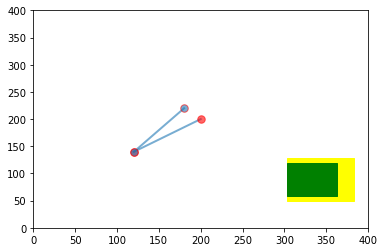

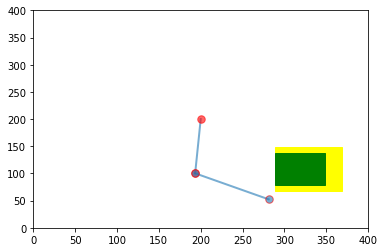

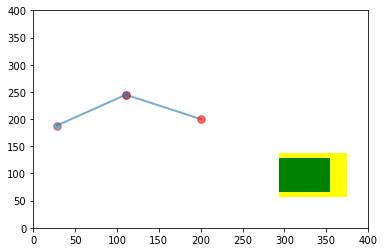

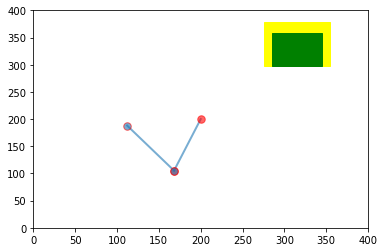

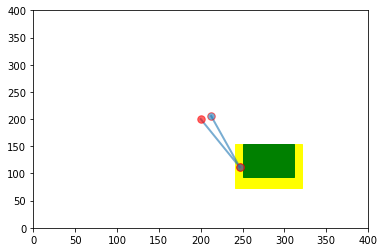

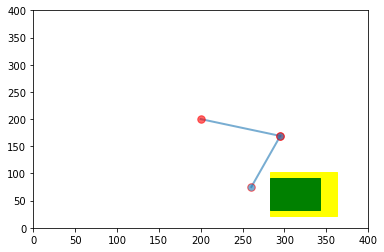

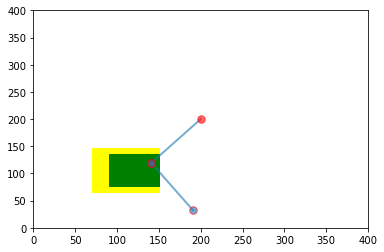

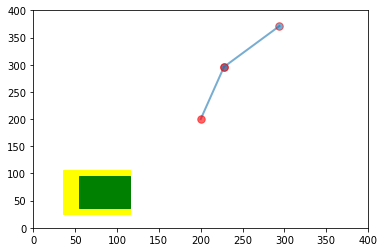

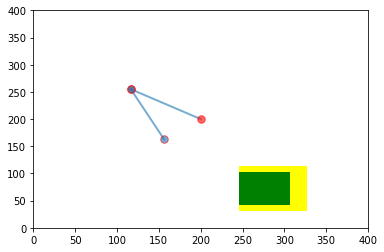

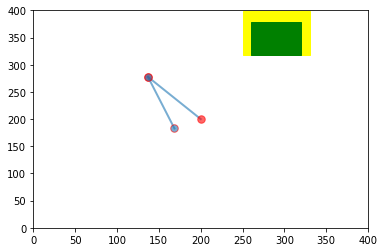

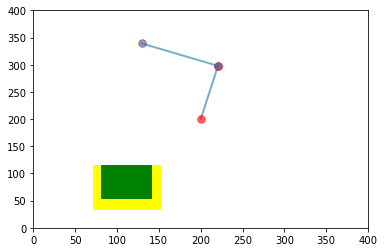

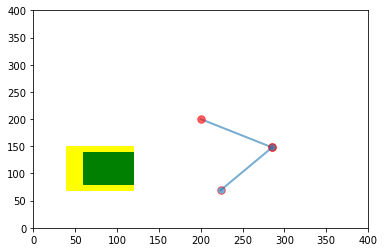

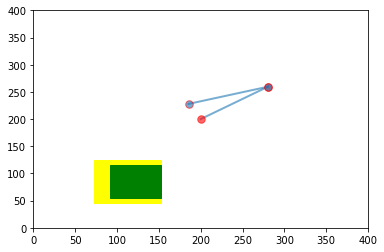

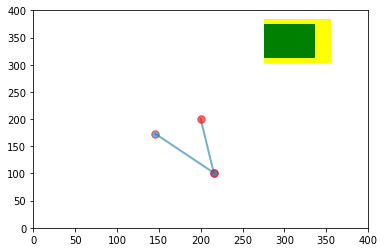

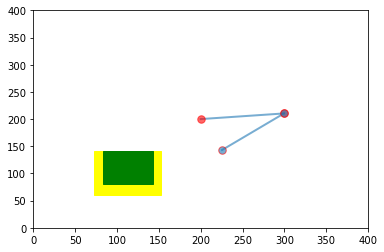

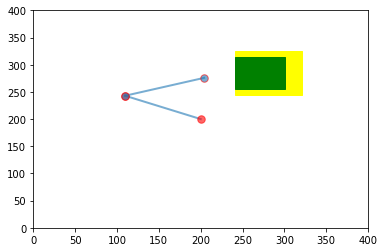

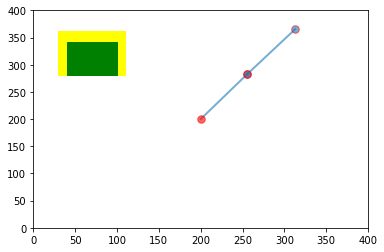

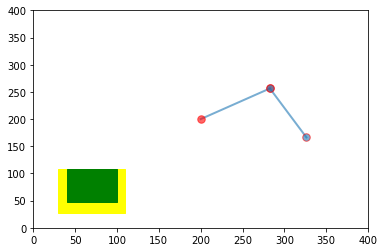

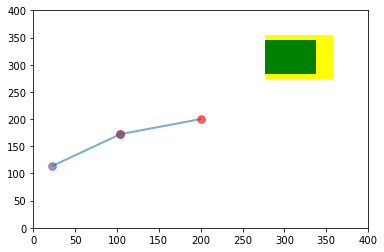

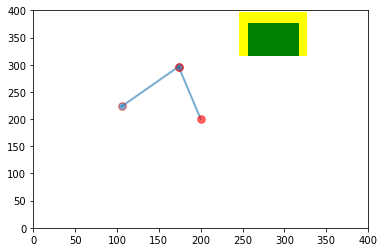

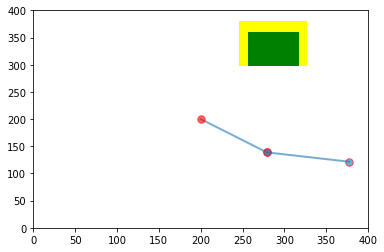

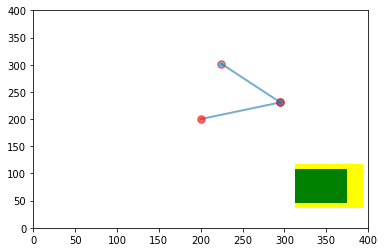

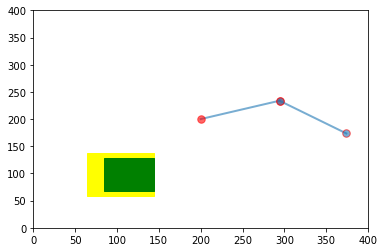

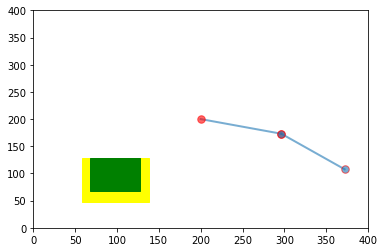

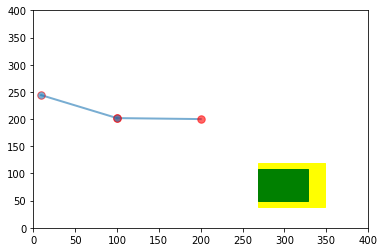

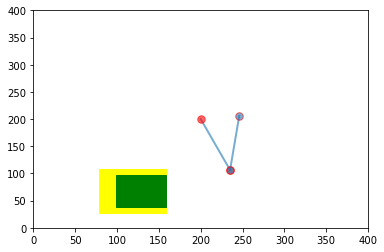

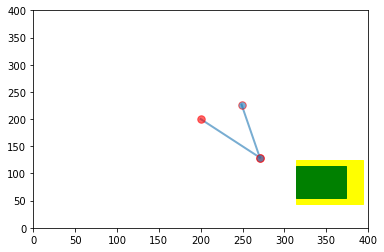

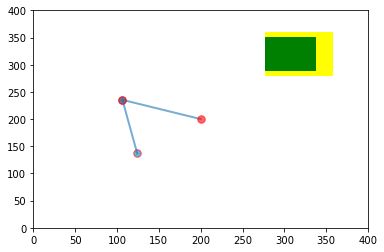

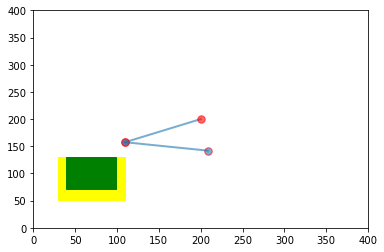

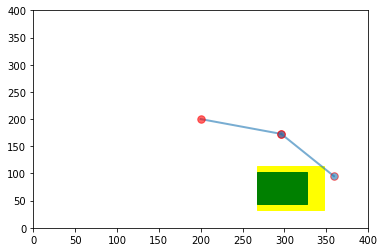

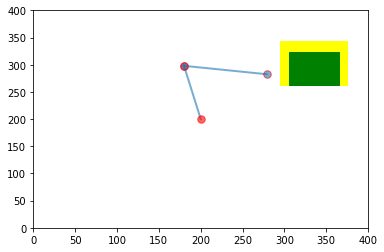

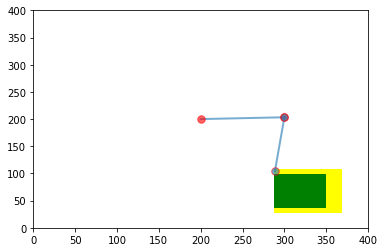

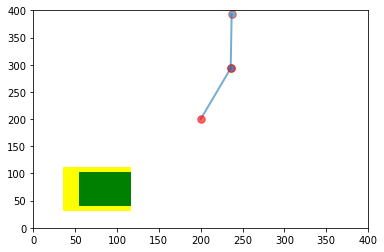

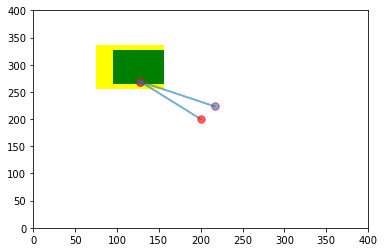

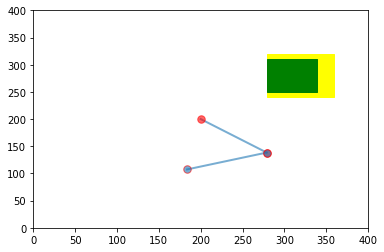

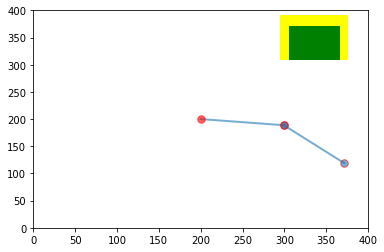

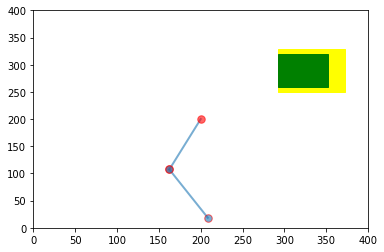

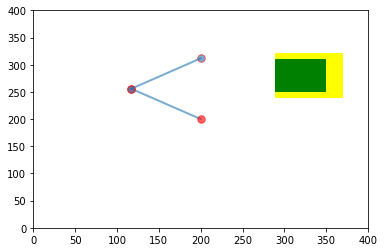

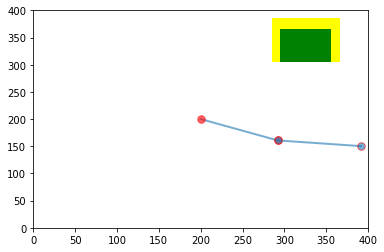

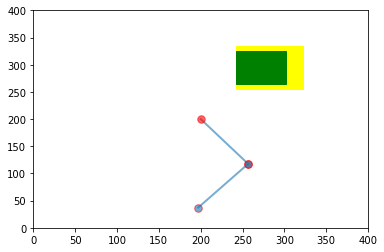

In [6]:
if TRAIN:
    train()

In [18]:
def test():
    env = ArmEnv()
    agent = Agent(input_dims=ops_dims, env=env, n_actions=action_size, 
                  model_dir=model_path, alpha=lr_a, beta=lr_c, 
                  gamma=gamma, max_size=memory_capacity, tau=tau, 
                  fc1=layer1, fc2=layer2, batch_size=batch_size, 
                  noise=noise)
    
    n_steps = 0
    while n_steps <= agent.batch_size:
        observation = env.reset()
        action = env.action_space.sample()
        observation_, reward, done = env.step(action)
        agent.remember(observation, action, reward, observation_, done)
        n_steps += 1
    agent.learn()
    agent.load_models()

    score_history = []
    step_history = []
    success = []
    for i in range(100):
        save_gif = False
        obs = env.reset()
        if i % 50 == 0:
            save_gif = True
            frames = [env.render(False)]
        done = False
        score = 0
        steps = 0
        for j in range(MAX_EP_STEPS):
            act = agent.choose_action(obs, True)
            new_state, reward, done = env.step(act)           
            score += reward
            obs = new_state
            if save_gif:
                frames.append(env.render(False))
            if done == True or j == MAX_EP_STEPS-1:
                if reward == 1.:
                    success.append(1)
                else:
                    success.append(0)
                step_history.append(j)
                score_history.append(score)
                break
                
        if save_gif:
            file = os.path.join(os.getcwd(), gifs_path, '{} _test_episode.gif'.format(i))
            imageio.mimwrite(file, frames, fps=7)
    print('avg_score %.3f' % np.mean(score_history[-100:]))
    print('number of success:', np.sum(success))

avg_score -1.162
number of success: 20


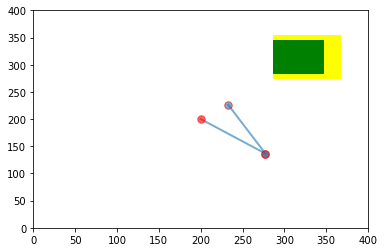

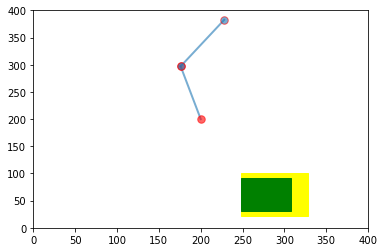

In [19]:
not_training = True
if not_training:
    test()